# **LOADING DATA**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
from keras.preprocessing import image
import math, cv2, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# upload kaggle.json yang didapatkan dari akun kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zulfahbinti","key":"f76121d131347b9e7069e8362ab66472"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset dari kaggle

!kaggle datasets download -d rahmalisaaulia/corndiseases

 99% 121M/122M [00:05<00:00, 33.7MB/s]
100% 122M/122M [00:05<00:00, 25.0MB/s]


In [ ]:
# unzip file

from zipfile import ZipFile
file_name = '/content/corndiseases.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

# **PREPROCESSING**

In [ ]:
train_dataset_path = "/content/Plant Diseases/train"
test_dataset_path = "/content/Plant Diseases/valid"

In [ ]:
# data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30, 
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
final_size = (224, 224)
final_batch = 32

In [ ]:
train_set = train_datagen.flow_from_directory(train_dataset_path,
                                                 target_size = final_size,
                                                 batch_size = final_batch,
                                                 class_mode = 'categorical')

Found 7316 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_dataset_path,
                                                 target_size = final_size,
                                                 batch_size = final_batch,
                                                 class_mode = 'categorical')

Found 1829 images belonging to 4 classes.


# **MODELLING**

# **Membuat Arsitektur CNN**

In [ ]:
# arsitektur model

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3), padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same',strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same',strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
opt = Adam(
    lr=0.001, 
    #momentum=0.9
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Mengcompile model
cnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
)

In [ ]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

**ADDING TWEAKS**

In [ ]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=4,
)

In [ ]:
num_epochs = 6
cnn_hist = cnn_model.fit(train_set,  
                         epochs=num_epochs, 
                         validation_data = test_set, 
                         verbose=2, 
                         steps_per_epoch = len(train_set),
                         validation_steps = len(test_set), 
                         callbacks = early_stop)

Epoch 1/6
229/229 - 100s - loss: 0.6008 - accuracy: 0.7295 - val_loss: 0.4917 - val_accuracy: 0.7950 - 100s/epoch - 437ms/step
Epoch 2/6
229/229 - 87s - loss: 0.2648 - accuracy: 0.9014 - val_loss: 0.1950 - val_accuracy: 0.9235 - 87s/epoch - 381ms/step
Epoch 3/6
229/229 - 86s - loss: 0.1713 - accuracy: 0.9340 - val_loss: 0.1825 - val_accuracy: 0.9317 - 86s/epoch - 376ms/step
Epoch 4/6
229/229 - 86s - loss: 0.1393 - accuracy: 0.9453 - val_loss: 0.1434 - val_accuracy: 0.9492 - 86s/epoch - 377ms/step
Epoch 5/6
229/229 - 86s - loss: 0.1155 - accuracy: 0.9527 - val_loss: 0.1280 - val_accuracy: 0.9574 - 86s/epoch - 374ms/step
Epoch 6/6
229/229 - 86s - loss: 0.1206 - accuracy: 0.9517 - val_loss: 0.1174 - val_accuracy: 0.9595 - 86s/epoch - 375ms/step


**VISUALISASI**

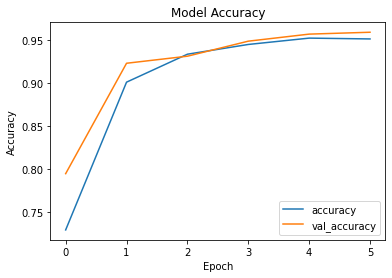

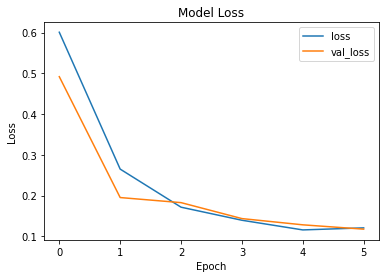

In [ ]:
# Membuat plot akurasi model 
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

print()

# Membuat plot loss model 
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
y_pred = cnn_model.predict(test_set)

58/58 [==============================] - 5s 88ms/step


In [ ]:
y_pred

array([[4.5407485e-02, 2.8516424e-05, 9.5451826e-01, 4.5741752e-05],
       [2.8231202e-02, 4.9869006e-05, 5.8406539e-02, 9.1331226e-01],
       [2.1597269e-04, 9.9978405e-01, 2.7266359e-11, 5.8158484e-16],
       ...,
       [4.9501620e-02, 1.4184215e-07, 9.5049822e-01, 3.1063909e-08],
       [2.7702084e-02, 5.6174368e-04, 2.8780092e-02, 9.4295609e-01],
       [9.9998510e-01, 1.4850032e-05, 1.7467322e-16, 2.4599149e-17]],
      dtype=float32)

# **UPLOAD GAMBAR**

Saving e10b0d3a-440b-46cd-a7f4-351196dcd1df___RS_GLSp 4323.JPG to e10b0d3a-440b-46cd-a7f4-351196dcd1df___RS_GLSp 4323.JPG
1/1 [==============================] - 0s 18ms/step
Tanamanmu Jagung terkena penyakit Gray_leaf_spot


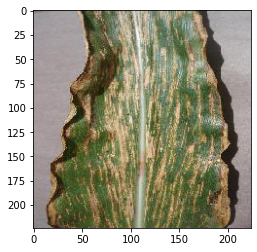

In [ ]:
from tensorflow.keras.preprocessing import image 

uploaded = files.upload()

for fn in uploaded.keys():
 
      
      img_path = fn
      img = image.load_img(img_path, target_size=(224, 224))
      imgplot = plt.imshow(img)
      
      # Preprocessing image
      x = image.img_to_array(img)
     
      # Scaling
      x = x/255
      x = np.expand_dims(x, axis=0)
    
      
      preds = cnn_model.predict(x)
      preds=np.argmax(preds, axis=1)

      if preds==0: #Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot
          preds="Tanamanmu Jagung terkena penyakit Gray_leaf_spot"
      elif preds==1: #Corn_(maize)_Common_rust
          preds="Tanamanmu Jagung terkena penyakit Common Rust"
      elif preds==2: #Corn_(maize)_Northern_Leaf_Blight
          preds="Tanamanmu Jagung terkena penyakit Leaf Blight"
      else: 
          preds="Yey tanamanmu Jagung sehat, pertahankan"
          
      print(preds)

# **SAVE MODEL**

In [ ]:
cnn_model.save_weights('model_corn_disease_weight.h5')

In [ ]:
# save ke json

model_json = cnn_model.to_json()
with open('model_corn_disease_1.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
# save ke h5 file
from tensorflow.keras.models import load_model

cnn_model.save('model_corn_disease.h5')